# Review

## [Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv( 'https://archive.ics.uci.edu/ml/''machine-learning-databases''/breast-cancer-wisconsin/wdbc.data', header=None)

In [9]:
# Let's check the dataframe

In [10]:
# note that the target variable is the first column

In [11]:
# How many 'M''s and 'B''s?

In [13]:
# How is the ratio of 'B' and 'M'

In [12]:
# Convert target variables into numerical data

In [14]:
# Missing Values?

## EDA

## Data Cleaning

## Data Preparation

__Splitting Data__

In [21]:
## use train-test split


__Scaling data__

In [19]:
## Standard scale data

__Creating New Features__

## Modeling

### Logistic Regression

__With No regularization__

In [22]:
## import Logistic regression

In [23]:
## instantiate LR with no penalty

In [24]:
## fit model

In [27]:
## from sklearn.metrics import confusion_matrix

In [28]:
## create a confusion matrix

In [2]:
## visualize confusion matrix with utils.py plot_confusion_matrix

__Validation__

In [4]:
## import -- from sklearn.model_selection import cross_validate

In [6]:
## call cross-validate with return_train_score, return estimator, cv =5

In [7]:
## investigate cv results

In [8]:
## Print results and keep them somewhere

In [9]:
## note that we could use other scoring options in cross_validate

[Cross_validate - Scoring](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate)

In [10]:
## note that sklearn has many other metric you can use

In [11]:
## from sklearn.metrics import recall_score, precision_score, roc_auc_score

### Logistic Regression with Regularization

In [12]:
## check the Logistic regression module again

__Grid Search Validation__

In [13]:
## import GridSerachCV from sklearn.model_selection

In [15]:
## prepare a grid with 'C' and 'penalty'

In [16]:
## instantiate the gridsearch

In [17]:
## fit grid search

In [18]:
## check gridsearch cv_results_

## we can make them a dataframe also

In [19]:
## print best parameters

In [21]:
## cross_validate the best estimator_

In [22]:
## pretty print test scores

In [24]:
## fit best regularization logreg and plot the confusion matrix

# Tree Based Models

## Decision Trees

In [25]:
## import decisiontree classifier

In [26]:
## instantiate

In [27]:
## cross_validate

In [29]:
## confusion matrix plot

## Random Forests

### Bootstrapping

<img src= "images/bootstrap1.png" style="height:450px">


### Bagging: Bootstrap Aggregation


__Core idea__

- Decision trees have high variance.

- We know averaging can reduce the variance. (Central Limit Theorem?)

- Why bootstrap though?

    - Averaging the same numbers yields the same number: [2,2,2,2]  --> avg: 2
    
    - You want each tree to learn a little bit differently so that averaging make sense.

__A little bit more details__


We will use this idea calculate $$ \hat{f}^{1}(x), \cdots, \hat{f}^{B}(x)$$ where each $\hat{f}^{i}$ represents a decision tree fitted to the bootstrapped data.

Then we will make a prediction by: 

$$ \hat{f}_{\text{avg}}(x) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}^{b}(x)$$

Note that this is for regression and for the classification we can get majority vote.

[sklearn averages over probabilities not majority vote](https://scikit-learn.org/stable/modules/ensemble.html#forest)


__Problem__ We still have some problem with this approach and random forests will address this problem. Can you see the issue?

- If we have a strong predictor then this will dominate in each tree.

Hint: Correlated trees

- Random forests adds some randomness into the procedure to make each tree uncorrolated.

### Implementation of Random Forest

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
rf = RandomForestClassifier(n_estimators= 300, min_impurity_decrease= 0.001 ,random_state= 2, oob_score= True, n_jobs= -1)

In [259]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.001, n_estimators=300, n_jobs=-1,
                       oob_score=True, random_state=2)

In [260]:
rf.oob_score_

0.9648351648351648

In [261]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
score = rf.score(X_train, y_train)
cm = confusion_matrix(y_train, y_pred)

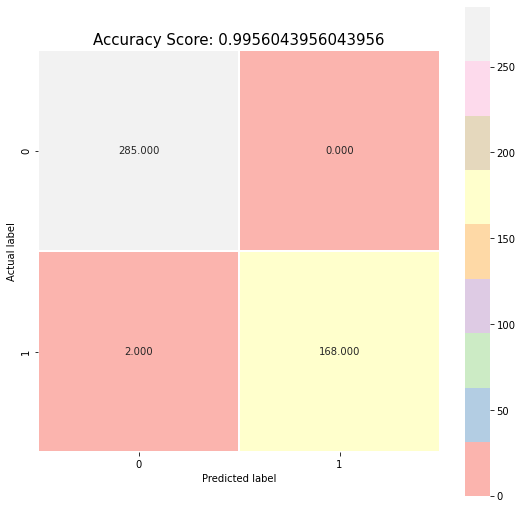

In [262]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('logs/random_forest.png')
plt.draw()

__Roc Curves__

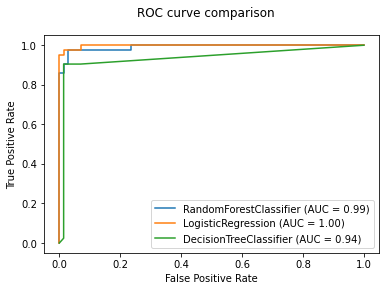

In [274]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm

rf.fit(X_train, y_train)

rfc_disp = metrics.plot_roc_curve(rf, X_test, y_test)  # doctest: +SKIP
log_disp = metrics.plot_roc_curve(lr, X_test_scaled, y_test, ax = rfc_disp.ax_)  # doctest: +SKIP
dct_disp = metrics.plot_roc_curve(dt_clf, X_test, y_test, ax = rfc_disp.ax_)  # doctest: +SKIP

rfc_disp.figure_.suptitle("ROC curve comparison")
plt.show()  

### Extra Material 

- [Sklearn averages probabilities in RF implementation](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [On the variance](https://newonlinecourses.science.psu.edu/stat414/node/167/)

- [Do RF immune to overfitting?](https://en.wikipedia.org/wiki/Talk%3ARandom_forest)

- [Tricky stuff with respect to feature importance](http://rnowling.github.io/machine/learning/2015/08/10/random-forest-bias.html)

- [An interesting implementation of feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-faces-py)

- [Different Ensemble Methods in sklearn](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [ISLR - section 8.2](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

- [Another library for RF: H2o](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html)